# Dataset analysis

**Choosing a dataset**

In [2]:
# either diabetes_130, diabetes_012 or adult
ana_dataset='adult'

### Loading Data

1. loading data into pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file
if ana_dataset == 'diabetes_130':
    df = pd.read_csv('./diabetes_130/diabetic_data.csv')
elif ana_dataset == 'diabetes_012':
    df = pd.read_csv('./diabetes_012/diabetes_012_health_indicators_BRFSS2015.csv')
elif ana_dataset == 'adult':
    df = pd.read_csv('./adult/adult.csv')

# print
# df

3. selected attributes for evaluation

In [4]:
# personal attributes depending on the data set 

if ana_dataset == 'diabetes_130':
    attributes = ['age', 'weight', 'gender', 'race']
elif ana_dataset == 'diabetes_012':
    attributes = ['Sex', 'Education', 'Age', 'Income']
elif ana_dataset == 'adult':
    attributes = ['age', 'native-country', 'sex', 'relationship']

for diabetes_012 the attribute values have to be changed

In [5]:
if ana_dataset == 'diabetes_012':
    for index, row in df.iterrows():
        for attribute in attributes:
            if attribute == 'Sex':
                if (row[attribute] == 1):
                    df.at[index, attribute] = 'male'
                elif(row[attribute] == 0):
                    df.at[index, attribute] = 'female'
                else:
                    df.at[index, attribute] = 'Unknown/Invalid'
            elif attribute == 'Age':
                if (row[attribute] == 1):
                    df.at[index, attribute] = '18-24'
                elif(row[attribute] == 2):
                    df.at[index, attribute] = '25-29'
                elif(row[attribute] == 3):
                    df.at[index, attribute] = '30-34'
                elif(row[attribute] == 4):
                    df.at[index, attribute] = '35-39'
                elif(row[attribute] == 5):
                    df.at[index, attribute] = '40-44'
                elif(row[attribute] == 6):
                    df.at[index, attribute] = '45-49'
                elif(row[attribute] == 7):
                    df.at[index, attribute] = '50-54'
                elif(row[attribute] == 8):
                    df.at[index, attribute] = '55-59'
                elif(row[attribute] == 9):
                    df.at[index, attribute] = '60-64'
                elif(row[attribute] == 10):
                    df.at[index, attribute] = '65-69'
                elif(row[attribute] == 11):
                    df.at[index, attribute] = '70-74'
                elif(row[attribute] == 12):
                    df.at[index, attribute] = '75-79'
                elif(row[attribute] == 13):
                    df.at[index, attribute] = '80+'
                else:
                    df.at[index, attribute] = 'Unknown/Invalid'
            elif attribute == 'Education':
                if (row[attribute] == 1):
                    df.at[index, attribute] = 'no school/only kindergarten'
                elif(row[attribute] == 2):
                    df.at[index, attribute] = 'elementary'
                elif(row[attribute] == 3):
                    df.at[index, attribute] = 'some high school'
                elif(row[attribute] == 4):
                    df.at[index, attribute] = 'high school graduate'
                elif(row[attribute] == 5):
                    df.at[index, attribute] = 'some college/technical school'
                elif(row[attribute] == 6):
                    df.at[index, attribute] = 'college graduate'
                else:
                    df.at[index, attribute] = 'Unknown/Invalid'
            elif attribute == 'Income':
                if (row[attribute] == 1):
                    df.at[index, attribute] = '< $10,000'
                elif(row[attribute] == 2):
                    df.at[index, attribute] = '< $15,000'
                elif(row[attribute] == 3):
                    df.at[index, attribute] = '< $20,000'
                elif(row[attribute] == 4):
                    df.at[index, attribute] = '< $25,000'
                elif(row[attribute] == 5):
                    df.at[index, attribute] = '< $35,000'
                elif(row[attribute] == 6):
                    df.at[index, attribute] = '< $50,000'
                elif(row[attribute] == 7):
                    df.at[index, attribute] = '< $75,000'
                elif(row[attribute] == 8):
                    df.at[index, attribute] = '>= $75,000'
                else:
                    df.at[index, attribute] = 'Unknown/Invalid'

    df.to_csv('./diabetes_012/diabetes_012_cleaned.csv', index=False)

which character represents missing data?

In [6]:
unknown = '?'

### Overall dataset structure

In [7]:
# columnes & rows
print('(rows, columns) =',df.shape)

# column information
print(df.info())

(rows, columns) = (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


- replacing unknown values in the dataset with an overall value for missing data

In [8]:
# replacing 'Unknown/Invalid' or else values with ?
df.replace('Unknown/Invalid', unknown, inplace=True)

In dataset adult, it is not clear if the value "South" in native country is supposed to represent "The Global South" or something else. Therefore, the value is replaced by the unknown value, because it can not be assigned to a gradation.

In [9]:
if ana_dataset == 'adult':
    df.replace('South', unknown, inplace=True)
    df.replace('Hong', 'Hong Kong', inplace=True)
    df.to_csv('./adult/adult_cleaned.csv', index=False)

**Analysing missing values per attribute**

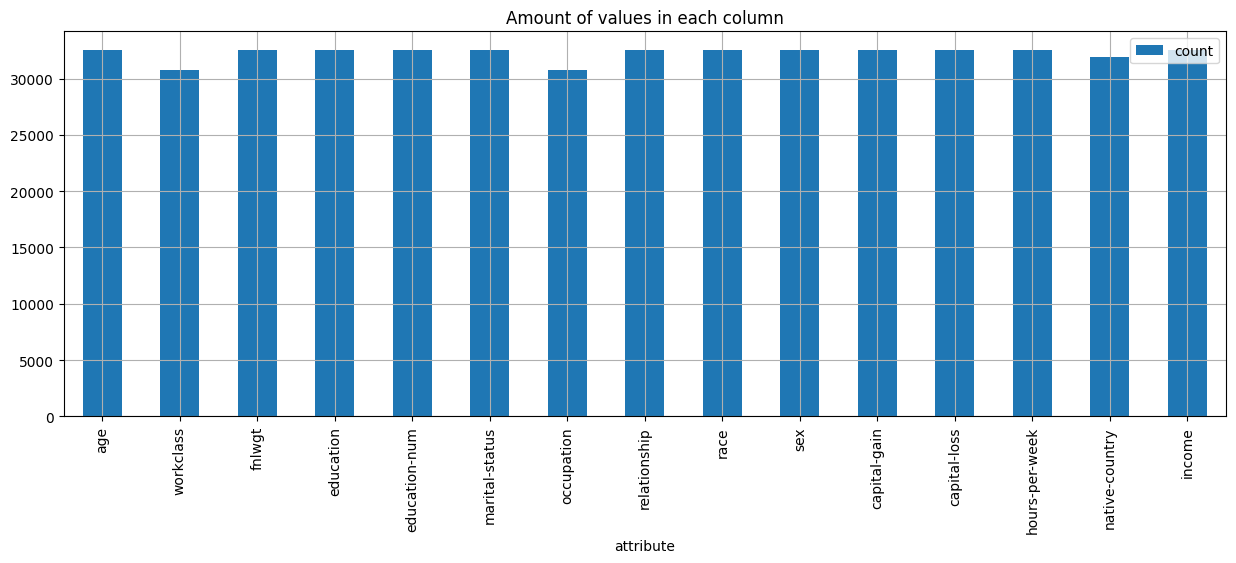

         attribute  count
0              age  32561
1        workclass  30725
2           fnlwgt  32561
3        education  32561
4    education-num  32561
5   marital-status  32561
6       occupation  30718
7     relationship  32561
8             race  32561
9              sex  32561
10    capital-gain  32561
11    capital-loss  32561
12  hours-per-week  32561
13  native-country  31898
14          income  32561


In [10]:
# finding missing values (?) in different columns

# for every column find the amount of existing values and add the count into a new dataframe count_attribute_values
count_attribute_values = pd.DataFrame(
    columns=['attribute', 'count']
)

for column in df:
    row_count_with_values = df.loc[df[column] != unknown].shape[0]
    count_attribute_values.loc[len(count_attribute_values.index)] = [column, row_count_with_values]

# plot the count_attribute_values dataframe to see the amount of missing values in each column in the original dataset
count_attribute_values.plot.bar(x='attribute', y='count', rot=90, title='Amount of values in each column', figsize=(15, 5), grid = True)
plt.show()
print(count_attribute_values)

#### Analysing single attributes

In [11]:
# check if attribute has '?' values

def attribute_has_empty_values(attribute):
    if (df.loc[df[attribute] == unknown].empty):
        print(attribute, 'column has no',unknown,'values')
        return False # no missing values
    else:
        print(attribute, 'column has',unknown,'values')
        return True # attribute has missing values

In [12]:
def plot_attribute_distribution(attribute):
    if(attribute_has_empty_values(attribute) == True):
        known_values = df.loc[df[attribute] != unknown].reset_index()
        #known_values.groupby(known_values[attribute]).size().plot(kind='bar', title=attribute+ ' distribution')
        known_values[attribute].value_counts().plot(kind='bar', title=attribute+ ' distribution')
    else:
        (df[attribute].value_counts().sort_index()).plot(kind='bar', title=attribute+ ' distribution', figsize=(15, 5), grid = True)

age column has no ? values
native-country column has ? values
sex column has no ? values
relationship column has no ? values


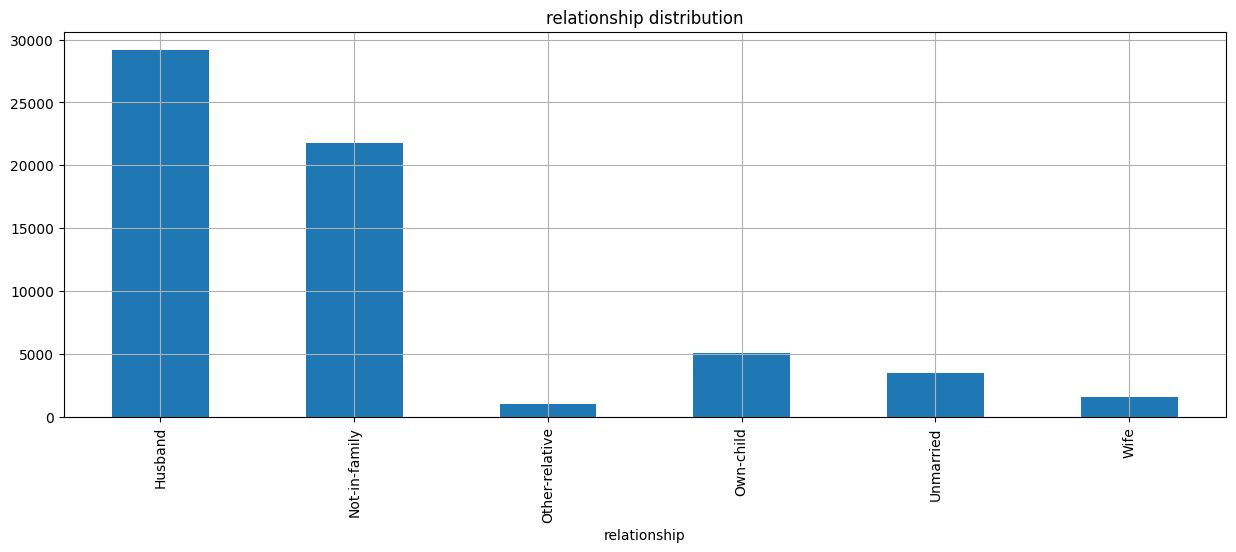

In [13]:
for attribute in attributes:
    # for diabetes_130 don't plot weight
    # for diabetes_012 don't plot Education
    if attribute != 'weight' or attribute != 'Education' or attribute != 'native-country':
        plot_attribute_distribution(attribute)


native-country column has ? values


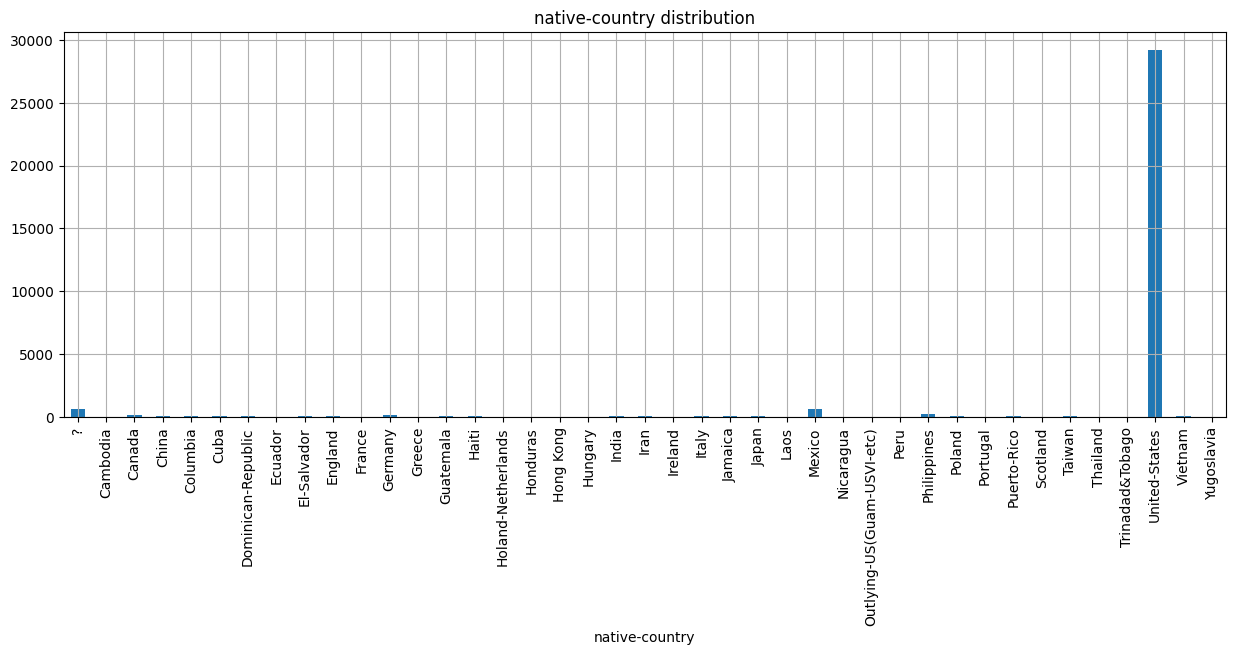

In [14]:
if ana_dataset == 'diabetes_130':
    attribute_has_empty_values('weight')
    # weight has '?' values, so we need to remove them to plot the distribution with the rest of the existing values
    known_weight = df.loc[df['weight'] != '?'].reset_index()
    sort_criteria = ['[0-25)','[25-50)','[50-75)','[75-100)','[100-125)','[125-150)','[150-175)','[175-200)','>200']
    (known_weight['weight'].value_counts().reindex(sort_criteria)).plot(kind='bar', title='Weight distribution without "?" values')
elif ana_dataset == 'diabetes_012':
    attribute_has_empty_values('Education')
    sort_criteria = ['no school/only kindergarten', 'elementary', 'some high school', 'high school graduate', 'some college/technical school', 'college graduate']
    df['Education'].value_counts().reindex(sort_criteria).plot(kind='bar', title= 'Education distribution')
elif ana_dataset == 'adult':
    attribute_has_empty_values('native-country')
    known_nat = df.loc[df['native-country'] != '?'].reset_index()
    df['native-country'].value_counts().sort_index().plot(kind='bar', title= 'native-country distribution', figsize=(15, 5), grid = True)